In [2]:
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from glob import glob
from PIL import Image
import pandas as pd

In [3]:
files = glob('data/*.jpg')
files[0:5]

['data/a_099.jpg',
 'data/b_025.jpg',
 'data/f_023.jpg',
 'data/i_084.jpg',
 'data/g_069.jpg']

In [4]:
len(files)

3208

#### Step 1 - Extract features from images with model of choice, in this case  VGG16

In [ ]:
birds = []
for file in files:
      # adds only the image files to the flowers list
    birds.append(file)
            
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    img = Image.open(file)
    #print(img.size)
    
    img = img.resize((224,224))

    #print(img.size)
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    print(img.shape)
    if img.shape == (224, 224):
        zeros_array_1 = np.zeros((224, 224))
        zeros_array_2 = np.zeros((224, 224))
        img = np.dstack([img, zeros_array_1, zeros_array_2])
    #print(img.shape)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    #reshaped_img = img.reshape(1,224,224,0)
    #print(1)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx)
    return features
   
data = {}

for i, bird in enumerate(birds):
    if i%20==0:
        print(i)
    feat = extract_features(bird,model)
    data[bird] = feat
   


# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

0
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_23']. Received: the structure of inputs=*
  warnings.warn(


(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2

In [8]:
len(feat)

3208

In [9]:
feat_list = feat.tolist()

In [10]:
len(feat_list)

3208

#### Step 2 - Create a DataFrame with all extracted features for PCA analysis and clustering

In [15]:
images_df = pd.DataFrame(columns = ['image_name','vit_embedding'])
images_df['image_name'] = birds
images_df['vit_embedding'] = feat_list

In [16]:
len(images_df)

3208

In [17]:
#df.to_csv('vg16.csv', sep='|', index = False)

In [18]:
embeddings_matrix = [row['vit_embedding'] for i, row in images_df.iterrows()]
embeddings_matrix[0]

[0.0,
 0.0,
 1.7407780885696411,
 0.0,
 0.21791034936904907,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.2142863273620605,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.8079930543899536,
 0.0,
 1.867618441581726,
 0.0,
 1.12795090675354,
 1.0839698314666748,
 4.288097381591797,
 0.6656339764595032,
 0.0,
 0.0,
 0.0,
 0.0,
 4.066256523132324,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6053014993667603,
 0.0,
 0.0,
 2.2327659130096436,
 0.0,
 1.2958767414093018,
 0.0,
 0.0,
 0.0,
 1.8594499826431274,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.266108989715576,
 0.0,
 0.0,
 0.0,
 0.0,
 0.21250426769256592,
 0.0,
 0.0,
 0.0,
 2.479954242706299,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.285893201828003,
 0.0,
 0.0,
 0.0,
 0.5665337443351746,
 0.0,
 0.0,
 2.2491488456726074,
 0.0,
 0.0,
 0.0,
 4.30037260055542,
 0.0,
 0.0,
 0.38369354605674744,
 0.0,
 0.0,
 0.0,
 0.0,
 1.705033540725708,
 0.0,
 0.0,
 0.0,
 1.384049892425537,
 0.0,
 8.043131828308105,
 0.0,
 0.0,
 1.107481598854065,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [19]:
embedding_array = np.array(embeddings_matrix)
embedding_array[0]

array([0.        , 0.        , 1.74077809, ..., 0.        , 0.        ,
       0.        ])

#### Step 3 - PCA Analysis

In [20]:
pca = PCA(n_components=200) # You can experiment with this number
vis_dims = pca.fit_transform(embedding_array)
vis_dims[0]

array([ -6.69445475, -15.83278033,  -9.71391283,   1.55599689,
        10.99324963,   0.31891123,  24.79025681,  -6.84025027,
        -1.6782342 , -10.25761845, -21.30498667,  13.48155551,
        -3.05408385,  -5.18537523,  17.5652371 ,   5.4816274 ,
       -18.01237704,  -4.94590631,  -2.09186282,  -0.70353259,
        17.06395386,  -2.04047677, -10.36569898, -11.01086649,
         1.69204393, -16.49729282, -12.45385648,   0.53817577,
        13.70869473,  -2.56776583,  -4.83764708,  -8.90604372,
        -8.99563743,  -6.13814034,  -5.65109584,   1.1073864 ,
         6.48725879,  -8.03739317,   9.01070155,  -3.38482685,
         4.49743268,  -0.45833009,  -5.44814851,   3.22799944,
       -10.4939869 ,   4.33596021,   3.04151729,  -5.81205647,
        -6.66927463,   2.66325422,   6.547314  ,   1.97501129,
        -3.01659452,   0.70702515,  -8.77521245,   0.66951636,
         3.93021475,   5.25307956,  -0.16640057,  -5.65620366,
         3.91423687,   1.58954626,   3.85814122,  -3.97

In [21]:
images_df["embed_vis"] = vis_dims.tolist()
len(images_df)

3208

In [22]:
images_df.head()

,image_name,vit_embedding,embed_vis
0,data/a_099.jpg,"[0.0, 0.0, 1.7407780885696411, 0.0, 0.21791034...","[-6.694454750328572, -15.832780332789104, -9.7..."
1,data/b_025.jpg,"[0.0, 0.0, 8.268568992614746, 0.0, 2.220561027...","[-37.52878638788838, 5.683914196655755, -7.564..."
2,data/f_023.jpg,"[0.0, 0.0, 1.9271992444992065, 0.0, 0.0, 0.0, ...","[30.332595881634454, 7.8656253919611485, 4.197..."
3,data/i_084.jpg,"[0.0, 0.0, 2.0502467155456543, 0.0, 0.14415946...","[5.098411505065485, -19.253174933824894, -14.5..."
4,data/g_069.jpg,"[0.0, 0.0, 4.708335876464844, 0.0, 0.0, 0.0, 0...","[-27.01723435554448, 41.82357052269263, 5.2367..."


Saving dataframe to csv to persist pca result (so it is not needed to run model in all images again if anything changes on clustering strategy

In [23]:
images_df[['image_name', 'embed_vis']].to_csv('pca_200_vgg16.csv', sep = '|', index = False)

#### Step 4 - Conduct elbow analysis to better estimate amount of clusters (amount of groups on dataset)

In [26]:
X = images_df['embed_vis'].to_list() # PCA para 3 componentes
Sum_of_squared_distances = []
K = range(1,200)
for k in K:
    print(k)
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


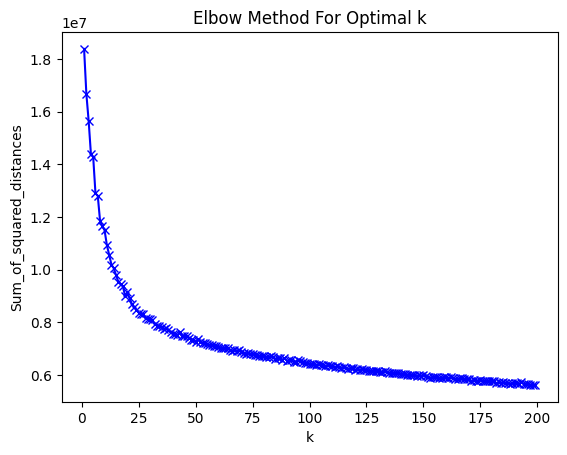

In [27]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Step 5 - Conduct kmeans clustering with optimal amount of clusters figured out by elbow analysis

In [28]:
kmeans = KMeans(n_clusters=20, init = 'k-means++', n_init= 'auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
len(y_kmeans)

3208

In [29]:
unique, counts = np.unique(y_kmeans, return_counts=True)
counts

array([173, 221, 154, 120, 162, 170, 139, 184, 156, 125, 150, 157, 101,
       168, 138, 134,  38, 104, 165, 449])

In [30]:
images_df['cluster_full'] = y_kmeans.tolist()
centers = kmeans.cluster_centers_.tolist()
centers

[[10.23819853171482,
  -9.863588701803483,
  11.183035254590324,
  -13.186748451851864,
  -0.8708996335621602,
  -22.796543326406812,
  7.974553709365033,
  -17.731632562136962,
  14.67013259588021,
  -9.034486344707698,
  4.365660218362668,
  0.6745092249788847,
  -9.296037009805168,
  9.00492854403037,
  -0.22817417159738404,
  -8.873570161196865,
  -3.9290163087096714,
  -4.9985200903398646,
  0.07921802242828427,
  -0.0021110068090238565,
  1.2328141818554197,
  0.35162607896423137,
  -1.327136649255053,
  3.871238406131385,
  1.63850714447023,
  1.170734486717833,
  2.0723443728125144,
  1.5642434501776608,
  -0.8036098772487317,
  0.15540243239602788,
  -0.8336637169993458,
  -0.5790397771582803,
  1.4932157813404392,
  -0.31929727855484347,
  0.22878694096908828,
  1.8730058795364006,
  0.1360129858255103,
  1.6102743997077094,
  -0.6558459392812276,
  -2.8355440169228836,
  1.5558680668241323,
  0.6839606656351791,
  1.560175890545293,
  1.9695235006986662,
  1.1414690530050344

#### Step 6 - Calculate distance between each distance and cluster centroid so we can be able to filter only "good" cluster representatives

In [31]:
images_df['pca_3_centroid'] = images_df['cluster_full'].apply(lambda x: centers[x])
len(images_df['pca_3_centroid'][0])

200

In [32]:
def euclidean_distance(a, b):
    array_a = np.array(a)
    array_b = np.array(b)
    euclidean_distance = np.linalg.norm(array_a - array_b)
    return euclidean_distance

In [33]:
images_df['eucledian_distance_centroid'] = images_df.apply(lambda x: euclidean_distance(x.embed_vis, x.pca_3_centroid), axis = 1)
images_df['eucledian_distance_centroid'][0:10]
#images_df['eucledian_distance_centroid'] = images_df.apply(lambda x: euclidean_distance(x.vit_embedding, x.pca_3_centroid), axis = 1)

0    59.519238
1    64.612523
2    48.113938
3    56.990558
4    66.866589
5    46.461731
6    68.027878
7    46.636351
8    35.228276
9    53.684683
Name: eucledian_distance_centroid, dtype: float64

In [34]:
clusters = images_df['cluster_full'].unique().tolist()
clusters.sort()

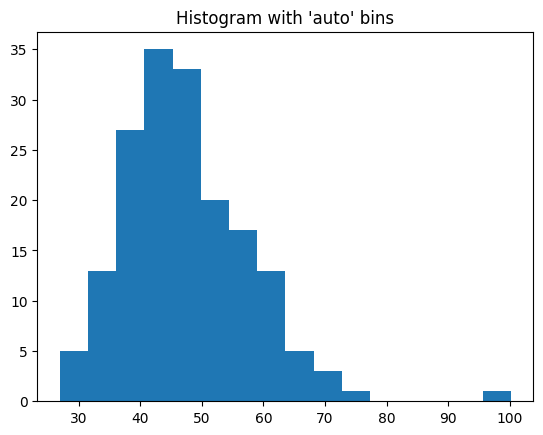

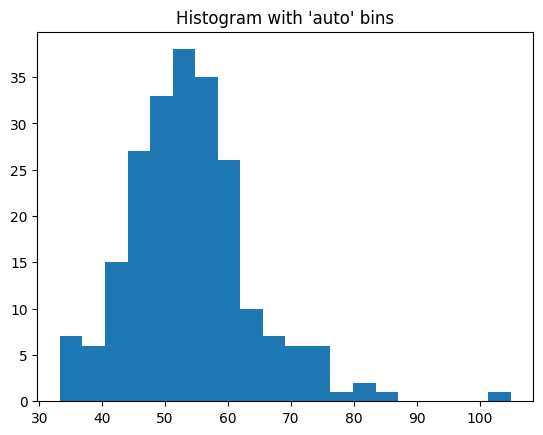

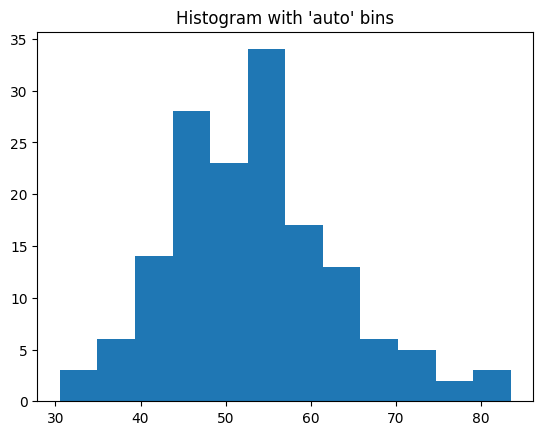

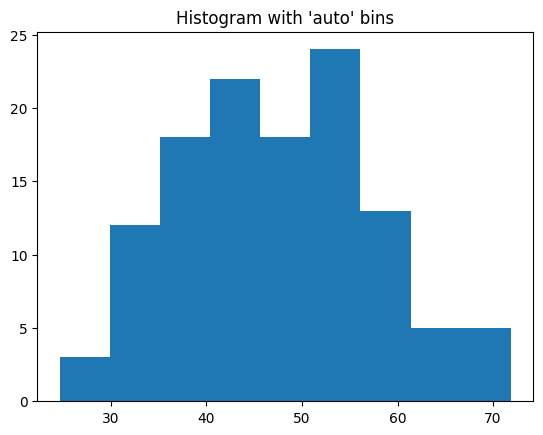

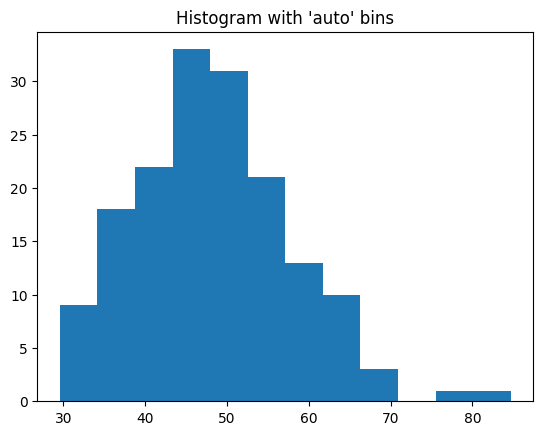

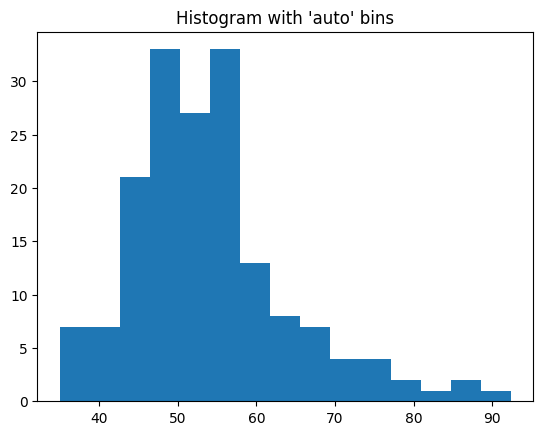

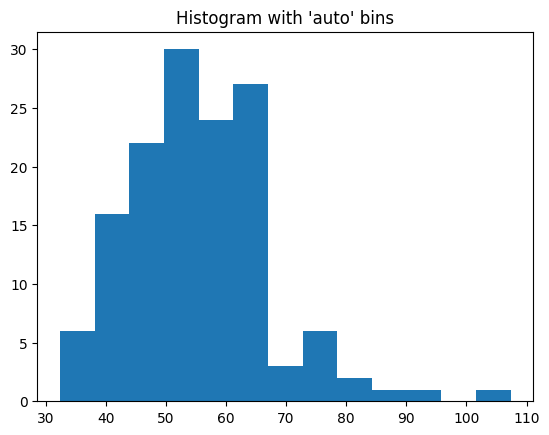

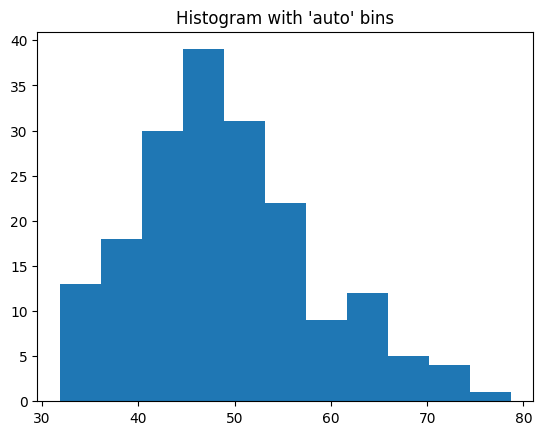

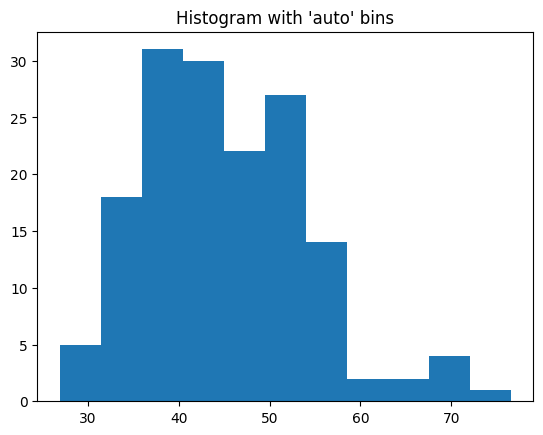

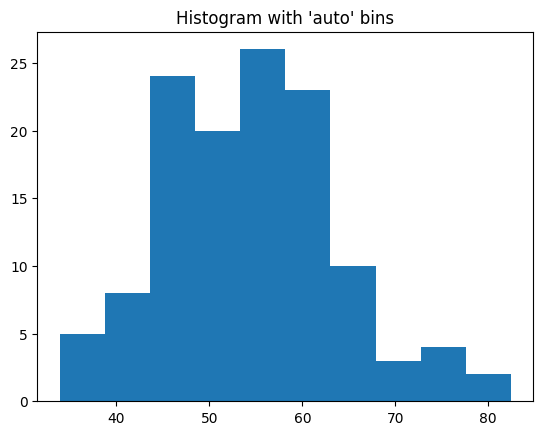

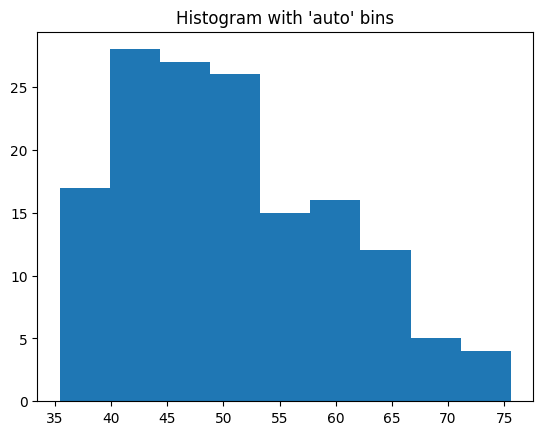

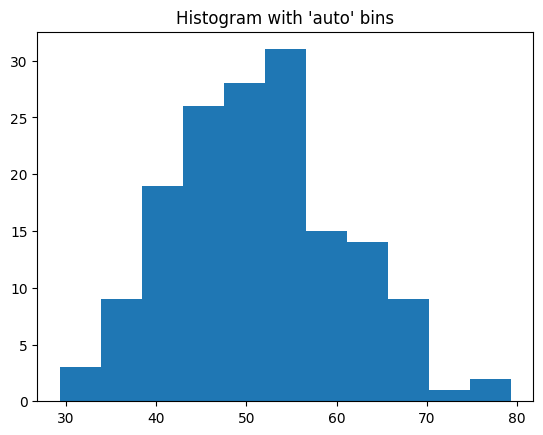

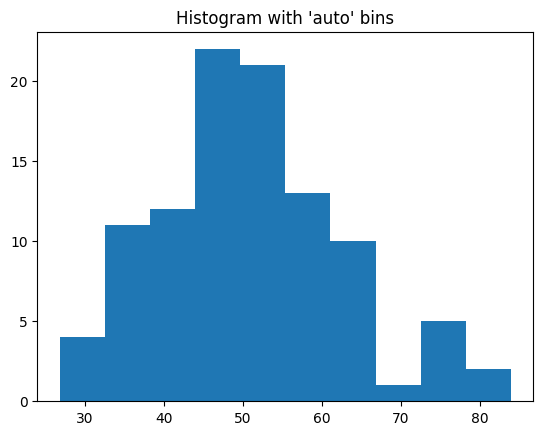

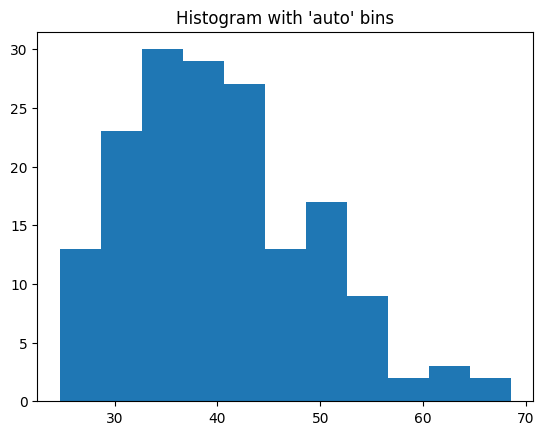

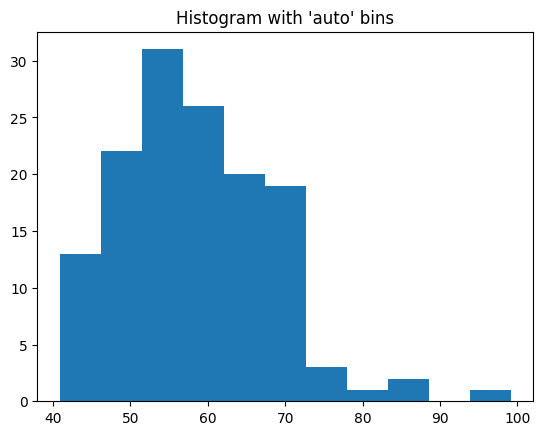

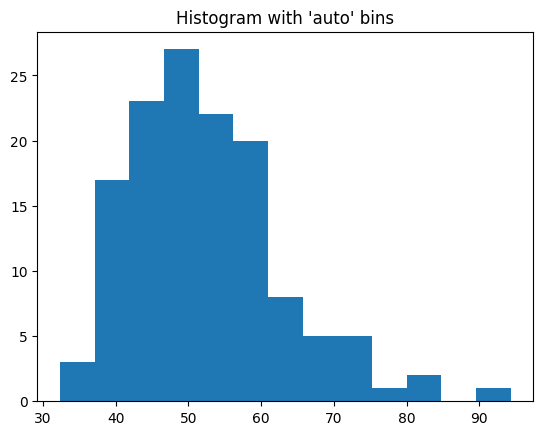

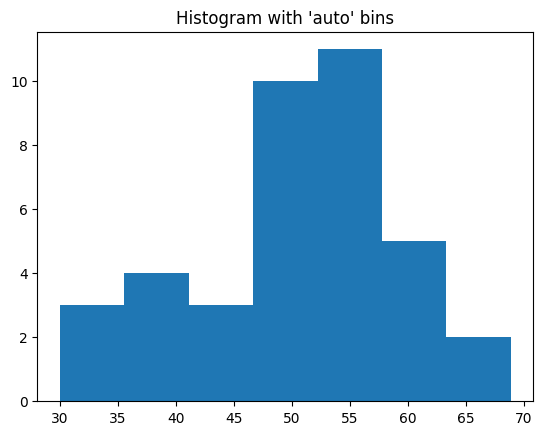

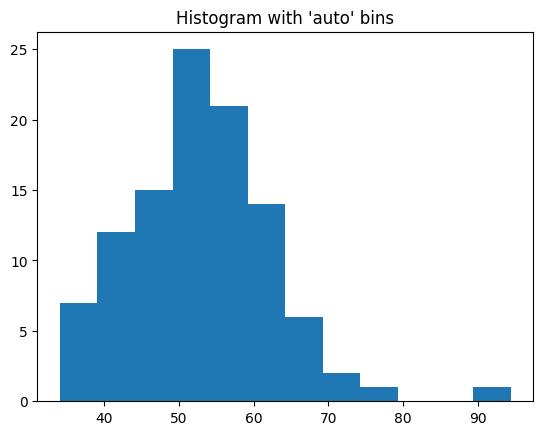

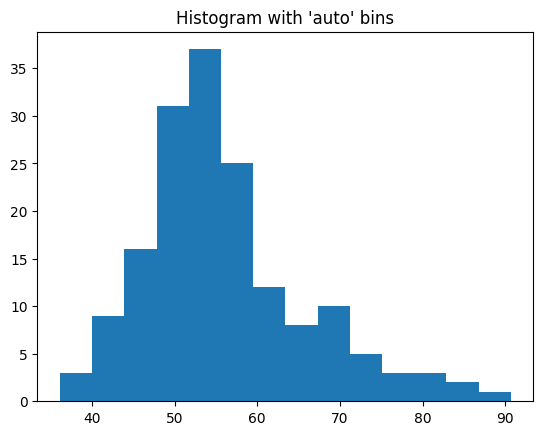

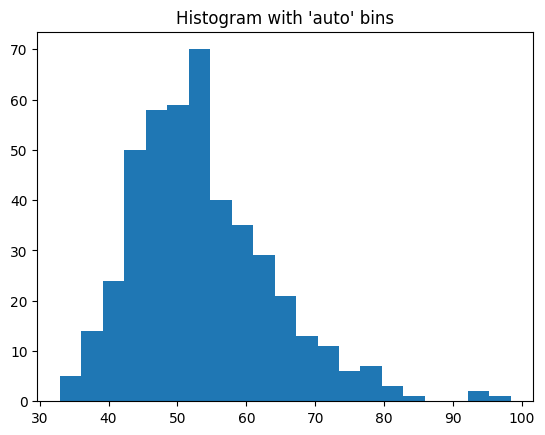

In [35]:
mean_distances = []
std_distances = []
for cluster in clusters:
    filter = images_df['cluster_full'] == cluster
    distances = np.array(images_df['eucledian_distance_centroid'][filter])
    plt.hist(distances, bins='auto')  # arguments are passed to np.histogram
    plt.title("Histogram with 'auto' bins")
    plt.show()
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)
    mean_distances.append(mean_distance)
    std_distances.append(std_distance)

In [36]:
images_df['mean_distance'] = images_df['cluster_full'].apply(lambda x: mean_distances[x])
images_df['std_distance'] = images_df['cluster_full'].apply(lambda x: std_distances[x])

In [37]:
def std_units(distance, mean_distance, std_distance):
    std_units = (distance - mean_distance) / std_distance
    return std_units

In [38]:
images_df['std_units'] = images_df.apply(lambda x: std_units(x.eucledian_distance_centroid,
                                                             x.mean_distance,
                                                             x.std_distance), axis = 1)
images_df['std_units'][0:5]

0    0.569754
1    0.873294
2   -0.547301
3    0.853943
4    0.961213
Name: std_units, dtype: float64

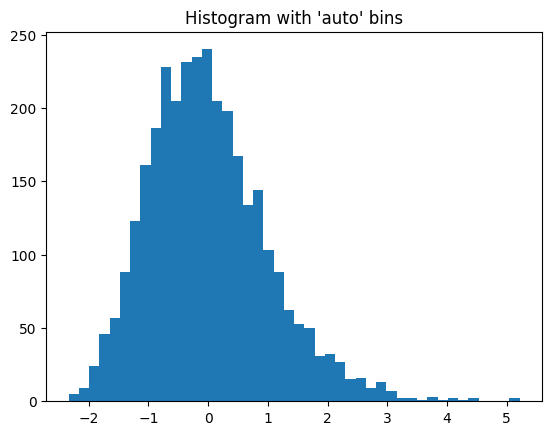

In [39]:
plt.hist(np.array(images_df['std_units']), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

#### Step 7 - Saving results for further exhibition on dashboard

In [41]:
#pca_matrix = np.array(images_df['embed_vis'].to_list())
images_df['pca_1'] = images_df['embed_vis'].apply(lambda x: x[0])
images_df['pca_2'] = images_df['embed_vis'].apply(lambda x: x[1])
images_df['pca_3'] = images_df['embed_vis'].apply(lambda x: x[2])
images_df['images_cluster_s'] = images_df['cluster_full'].apply(lambda x: str(x))

In [42]:
images_df[['image_name', 'pca_1', 'pca_2', 'pca_3','images_cluster_s', 'std_units']].to_csv(f'birds.csv', sep = '|', index = False)